In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [7]:
df.shape

(400, 11)

In [8]:
df.corr()

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Data Visualisation

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\3277161747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sales)


<Axes: xlabel='Sales', ylabel='Density'>

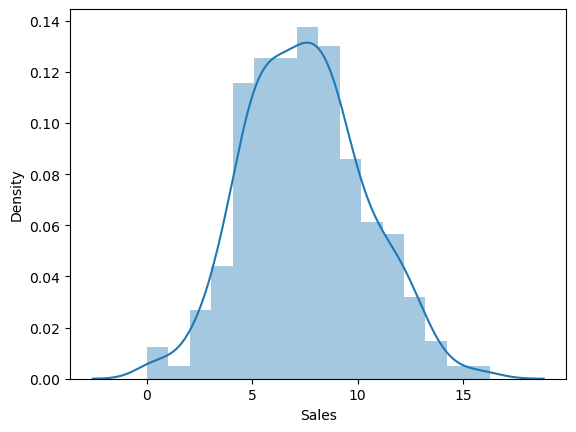

In [10]:
sns.distplot(df.Sales)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\4036062742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CompPrice)


<Axes: xlabel='CompPrice', ylabel='Density'>

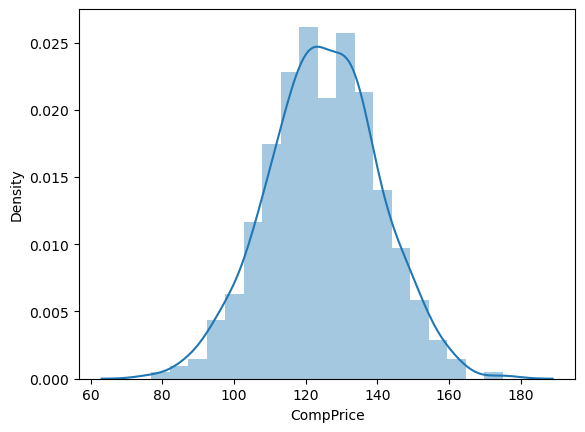

In [11]:
sns.distplot(df.CompPrice)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\743578500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Income)


<Axes: xlabel='Income', ylabel='Density'>

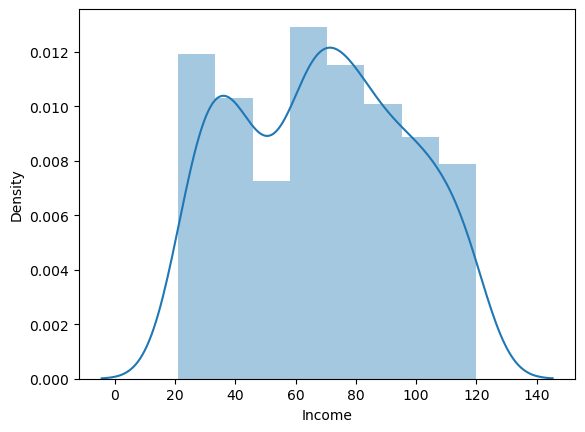

In [12]:
sns.distplot(df.Income)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\4125713948.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Advertising)


<Axes: xlabel='Advertising', ylabel='Density'>

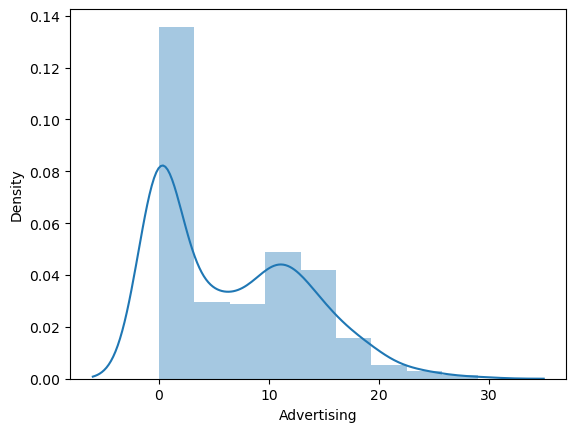

In [13]:
sns.distplot(df.Advertising)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\824416946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

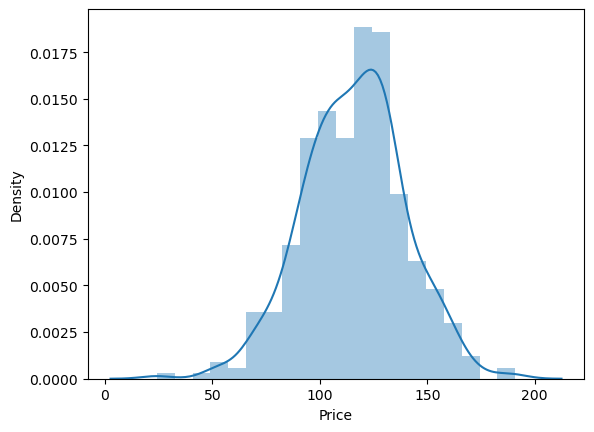

In [14]:
sns.distplot(df.Price)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\312454358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Population)


<Axes: xlabel='Population', ylabel='Density'>

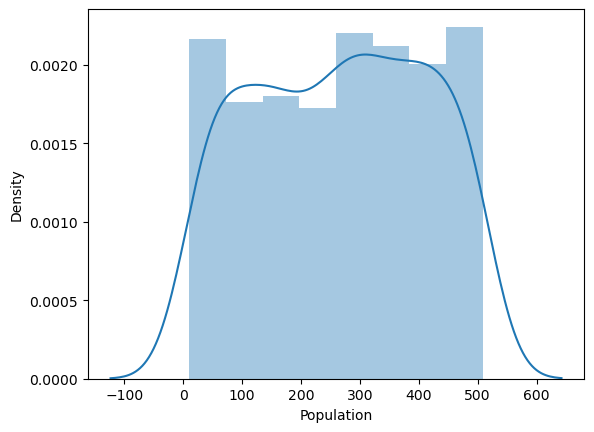

In [15]:
sns.distplot(df.Population)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\2837972681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Education)


<Axes: xlabel='Education', ylabel='Density'>

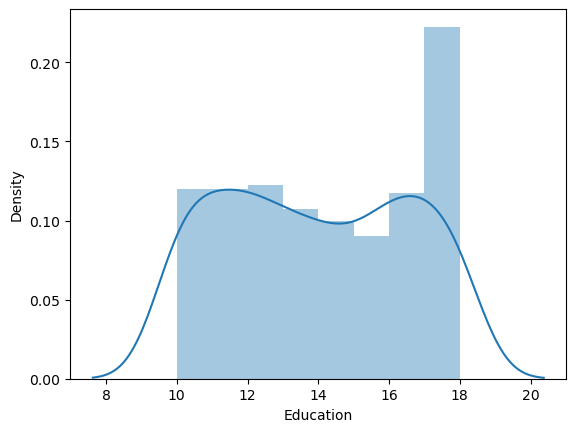

In [16]:
sns.distplot(df.Education)

C:\Users\vishal\AppData\Local\Temp\ipykernel_10896\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

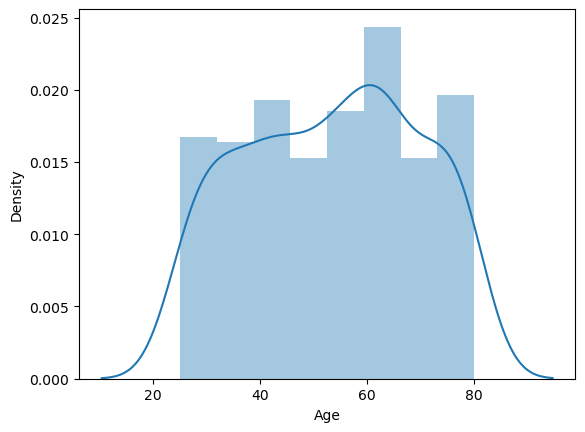

In [17]:
sns.distplot(df.Age)

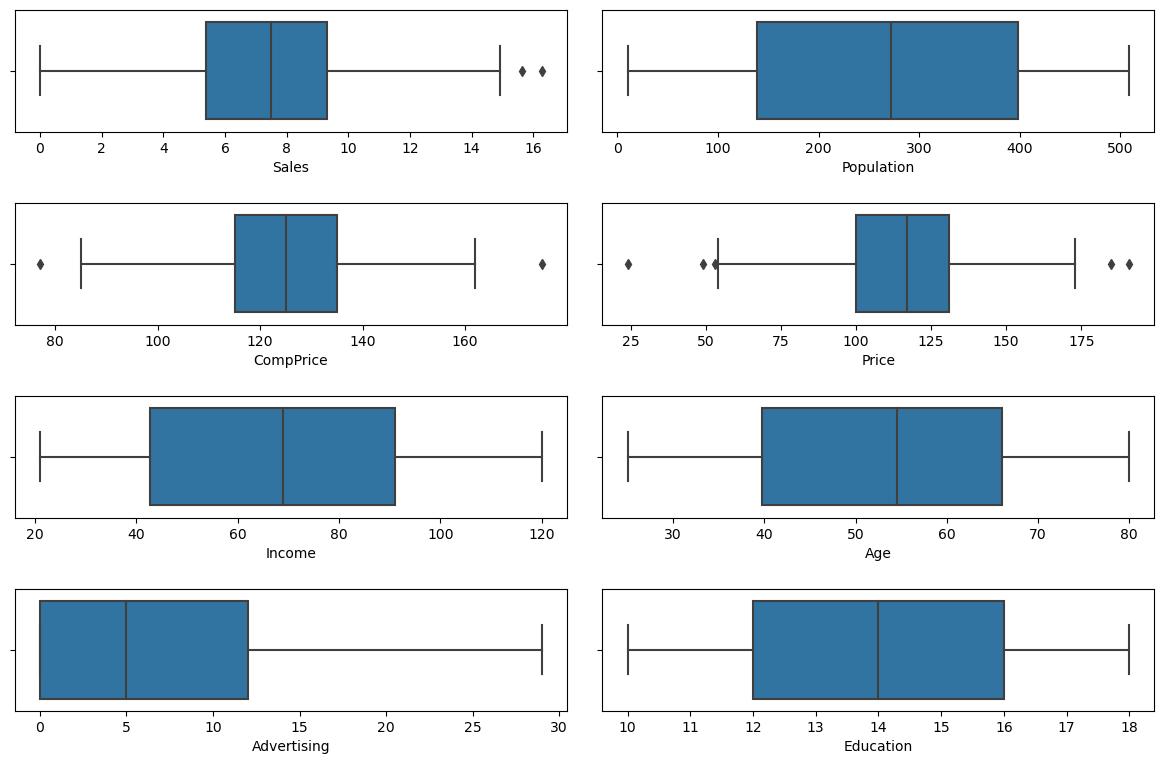

In [18]:
fig, axes=plt.subplots(4,2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=df,ax=axes[0,0])
sns.boxplot(x='CompPrice',data=df,ax=axes[1,0])
sns.boxplot(x='Income',data=df,ax=axes[2,0])
sns.boxplot(x='Advertising',data=df,ax=axes[3,0])
sns.boxplot(x='Population',data=df,ax=axes[0,1])
sns.boxplot(x='Price',data=df,ax=axes[1,1])
sns.boxplot(x='Age',data=df,ax=axes[2,1])
sns.boxplot(x='Education',data=df,ax=axes[3,1])
plt.tight_layout(pad=2.0)

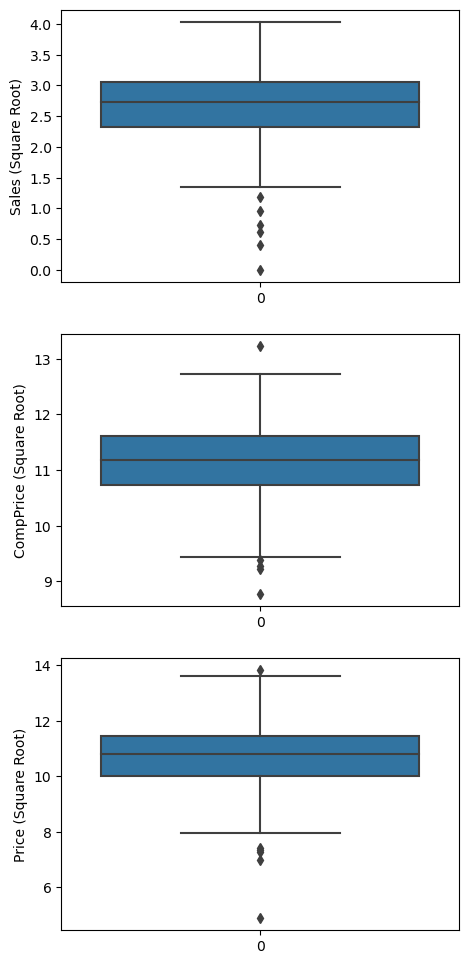

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, figsize=(5, 10))  # Increase figsize to accommodate 3 subplots in a single column

# Apply square root transformation to each variable and create boxplots
sns.boxplot(np.sqrt(df['Sales']), ax=axes[0])
sns.boxplot(np.sqrt(df['CompPrice']), ax=axes[1])
sns.boxplot(np.sqrt(df['Price']), ax=axes[2])

# Set y-axis labels for each subplot
axes[0].set_ylabel('Sales (Square Root)')
axes[1].set_ylabel('CompPrice (Square Root)')
axes[2].set_ylabel('Price (Square Root)')

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()


<bound method _AxesBase.set_ylabel of <Axes: >>

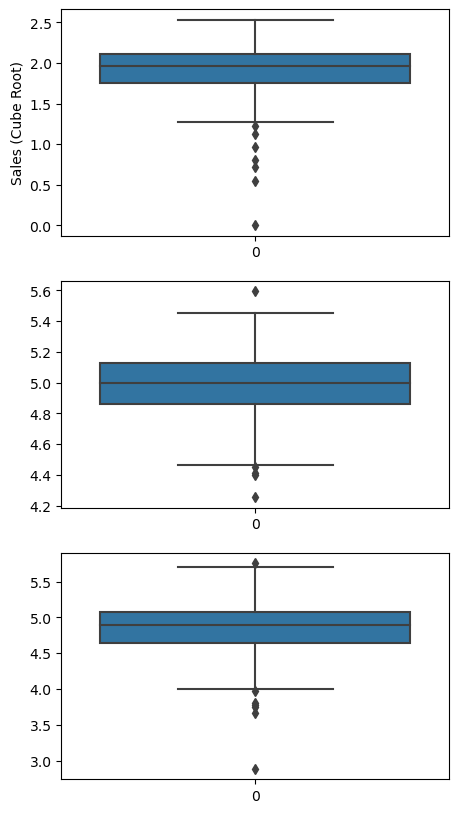

In [20]:
fig, axes = plt.subplots(3, figsize=(5, 10))  # Increase figsize to accommodate 3 subplots in a single column

# Apply cube root transformation to each variable and create boxplots
sns.boxplot(np.cbrt(df['Sales']), ax=axes[0])
sns.boxplot(np.cbrt(df['CompPrice']), ax=axes[1])
sns.boxplot(np.cbrt(df['Price']), ax=axes[2])

# Set y-axis labels for each subplot
axes[0].set_ylabel('Sales (Cube Root)')
axes[1].set_ylabel


C:\Users\vishal\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


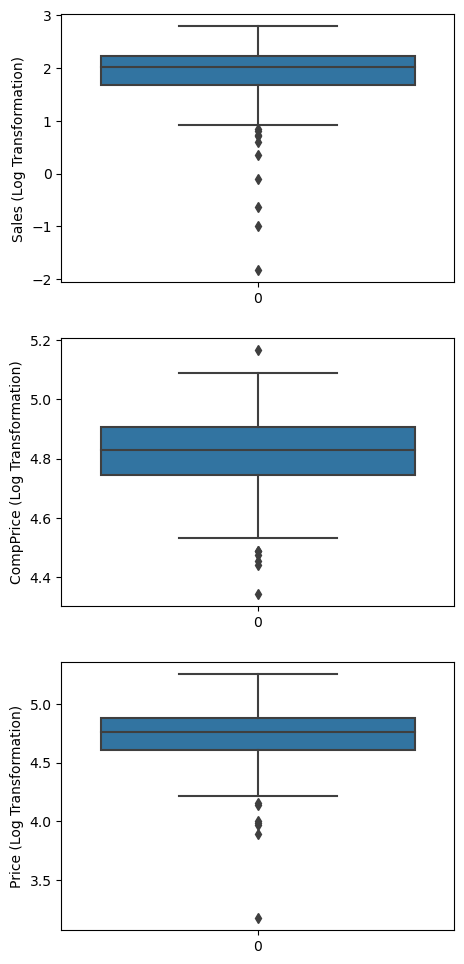

In [21]:
fig, axes = plt.subplots(3, figsize=(5, 10))  # Increase figsize to accommodate 3 subplots in a single column

# Apply natural logarithm transformation to each variable and create boxplots
sns.boxplot(np.log(df['Sales']), ax=axes[0])
sns.boxplot(np.log(df['CompPrice']), ax=axes[1])
sns.boxplot(np.log(df['Price']), ax=axes[2])

# Set y-axis labels for each subplot
axes[0].set_ylabel('Sales (Log Transformation)')
axes[1].set_ylabel('CompPrice (Log Transformation)')
axes[2].set_ylabel('Price (Log Transformation)')

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()


In [22]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


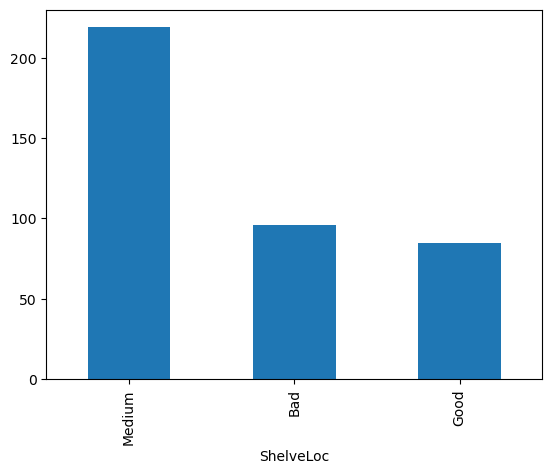

In [23]:
df['ShelveLoc'].value_counts().plot.bar()
plt.xlabel('ShelveLoc')
print(df['ShelveLoc'].value_counts())

Yes    282
No     118
Name: Urban, dtype: int64


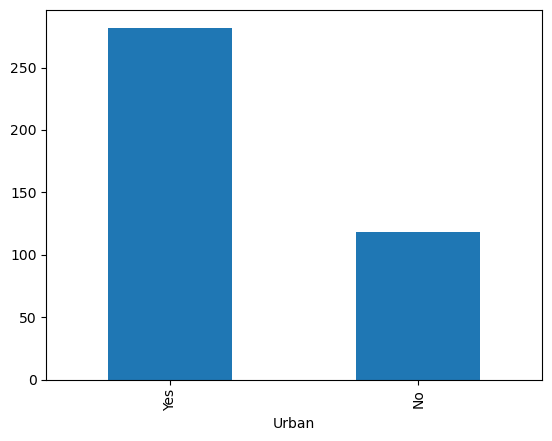

In [24]:
df['Urban'].value_counts().plot.bar()
plt.xlabel('Urban')
print(df['Urban'].value_counts())

Yes    258
No     142
Name: US, dtype: int64


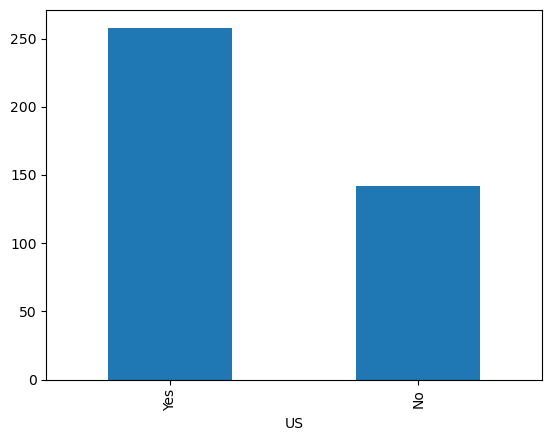

In [25]:
df['US'].value_counts().plot.bar()
plt.xlabel('US')
print(df['US'].value_counts())

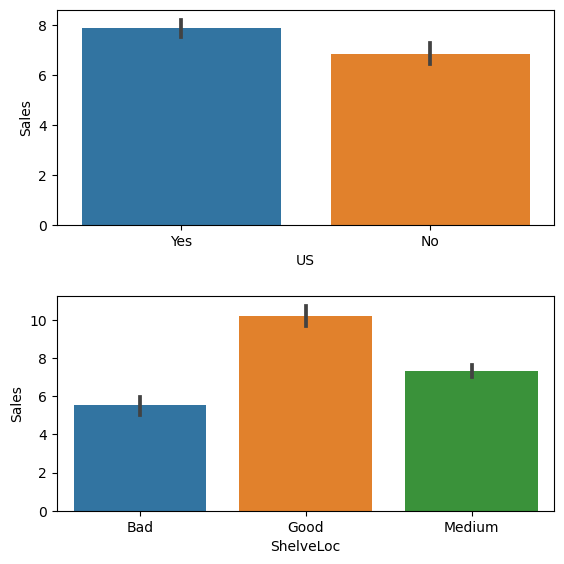

In [26]:
fig, axes=plt.subplots(2, figsize=(6,6),sharex=False,sharey=False)
sns.barplot(y= 'Sales',x ='US', data=df, ax=axes[0])
sns.barplot(y= 'Sales',x= 'ShelveLoc', data=df, ax=axes[1])
plt.tight_layout(pad=2.0)

<Axes: xlabel='US', ylabel='Advertising'>

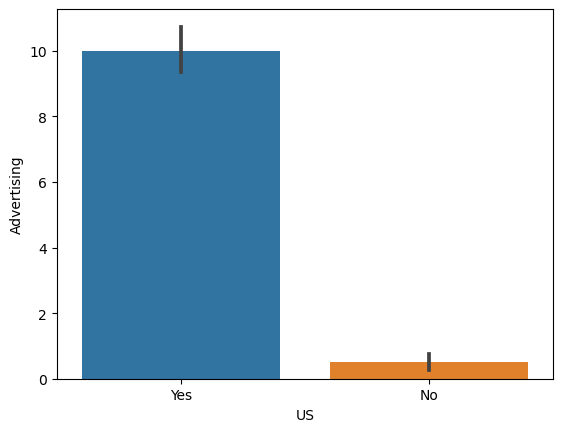

In [27]:
sns.barplot(y= 'Advertising',x ='US', data=df)

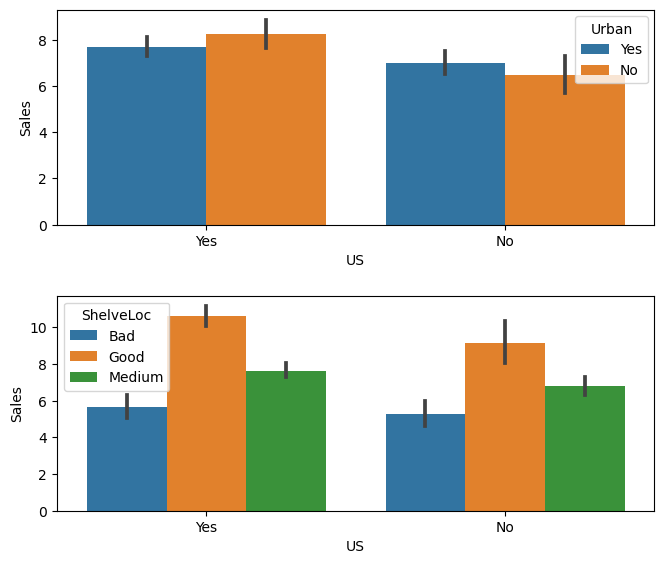

In [28]:
fig, axes=plt.subplots(2, figsize=(7,6),sharex=False,sharey=False)
sns.barplot(y= 'Sales',x ='US', hue='Urban', data=df, ax=axes[0])
sns.barplot(y= 'Sales',x= 'US', hue='ShelveLoc', data=df, ax=axes[1])
plt.tight_layout(pad=2.0)

In [29]:
df1 = pd.get_dummies(df)

In [30]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [31]:
df1.corr().iloc[0,:]

Sales               1.000000
CompPrice           0.064079
Income              0.151951
Advertising         0.269507
Population          0.050471
Price              -0.444951
Age                -0.231815
Education          -0.051955
ShelveLoc_Bad      -0.393167
ShelveLoc_Good      0.500510
ShelveLoc_Medium   -0.073999
Urban_No            0.015419
Urban_Yes          -0.015419
US_No              -0.177093
US_Yes              0.177093
Name: Sales, dtype: float64

In [32]:
import ppscore as pps

In [33]:
with pd.option_context("display.max_rows", None):
    display(pps.matrix(df1))

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
5,Sales,Price,0.000000,regression,True,mean absolute error,18.720000,23.392917,DecisionTreeRegressor()
6,Sales,Age,0.000000,regression,True,mean absolute error,13.877500,18.119167,DecisionTreeRegressor()
7,Sales,Education,0.000000,regression,True,mean absolute error,2.285000,2.811667,DecisionTreeRegressor()
8,Sales,ShelveLoc_Bad,0.000000,regression,True,mean absolute error,0.240000,0.293750,DecisionTreeRegressor()
9,Sales,ShelveLoc_Good,0.000000,regression,True,mean absolute error,0.212500,0.223750,DecisionTreeRegressor()


In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
df2 = pd.read_csv('Company_Data.csv')

In [36]:
df2=pd.get_dummies(df2)

In [37]:
clf = IsolationForest(random_state=10, contamination=.015)
clf.fit(df2)

IsolationForest(contamination=0.015, random_state=10)

In [38]:
df2['anamoly'] = clf.predict(df2.iloc[:,0:15])

In [39]:
df2[df2['anamoly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,anamoly
5,10.81,124,113,13,501,72,78,16,1,0,0,1,0,0,1,-1
25,14.90,139,32,0,176,82,54,11,0,1,0,1,0,1,0,-1
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-1
159,9.32,119,60,0,372,70,30,18,1,0,0,1,0,1,0,-1
284,6.97,106,46,11,414,96,79,17,1,0,0,1,0,1,0,-1
317,6.41,142,30,0,472,136,80,15,0,1,0,1,0,1,0,-1


In [40]:
df_final = df1.drop([5,25,75,159,284,317])

In [41]:
df_final.shape

(394, 15)

In [42]:
array = df_final.values
x = array[:,1:15]
y = array[:, 0]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

In [44]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [45]:
print(model.feature_importances_)

[0.0534372  0.02477461 0.03522582 0.0279263  0.26311226 0.08793021
 0.         0.10600866 0.40158493 0.         0.         0.
 0.         0.        ]


In [46]:
df_final.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

[Text(0.5, 0.9, 'x[8] <= 0.5\nsquared_error = 7.814\nsamples = 354\nvalue = 7.326'),
 Text(0.25, 0.7, 'x[4] <= 105.5\nsquared_error = 5.866\nsamples = 283\nvalue = 6.636'),
 Text(0.125, 0.5, 'x[5] <= 54.5\nsquared_error = 5.504\nsamples = 91\nvalue = 8.049'),
 Text(0.0625, 0.3, 'x[1] <= 57.5\nsquared_error = 3.973\nsamples = 34\nvalue = 9.556'),
 Text(0.03125, 0.1, 'squared_error = 1.668\nsamples = 11\nvalue = 7.959'),
 Text(0.09375, 0.1, 'squared_error = 3.273\nsamples = 23\nvalue = 10.32'),
 Text(0.1875, 0.3, 'x[7] <= 0.5\nsquared_error = 4.254\nsamples = 57\nvalue = 7.15'),
 Text(0.15625, 0.1, 'squared_error = 2.992\nsamples = 39\nvalue = 7.791'),
 Text(0.21875, 0.1, 'squared_error = 4.169\nsamples = 18\nvalue = 5.761'),
 Text(0.375, 0.5, 'x[7] <= 0.5\nsquared_error = 4.643\nsamples = 192\nvalue = 5.967'),
 Text(0.3125, 0.3, 'x[0] <= 124.5\nsquared_error = 3.936\nsamples = 134\nvalue = 6.501'),
 Text(0.28125, 0.1, 'squared_error = 2.977\nsamples = 46\nvalue = 5.483'),
 Text(0.34375,

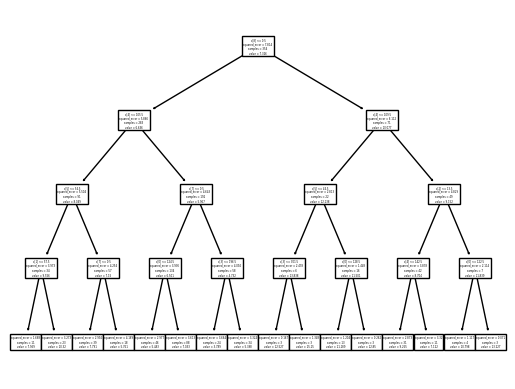

In [47]:
tree.plot_tree(model)

[Text(0.5, 0.9, 'ShelveLoc_Good <= 0.5\nsquared_error = 7.814\nsamples = 354\nvalue = 7.326'),
 Text(0.25, 0.7, 'Price <= 105.5\nsquared_error = 5.866\nsamples = 283\nvalue = 6.636'),
 Text(0.125, 0.5, 'Age <= 54.5\nsquared_error = 5.504\nsamples = 91\nvalue = 8.049'),
 Text(0.0625, 0.3, 'Income <= 57.5\nsquared_error = 3.973\nsamples = 34\nvalue = 9.556'),
 Text(0.03125, 0.1, 'squared_error = 1.668\nsamples = 11\nvalue = 7.959'),
 Text(0.09375, 0.1, 'squared_error = 3.273\nsamples = 23\nvalue = 10.32'),
 Text(0.1875, 0.3, 'ShelveLoc_Bad <= 0.5\nsquared_error = 4.254\nsamples = 57\nvalue = 7.15'),
 Text(0.15625, 0.1, 'squared_error = 2.992\nsamples = 39\nvalue = 7.791'),
 Text(0.21875, 0.1, 'squared_error = 4.169\nsamples = 18\nvalue = 5.761'),
 Text(0.375, 0.5, 'ShelveLoc_Bad <= 0.5\nsquared_error = 4.643\nsamples = 192\nvalue = 5.967'),
 Text(0.3125, 0.3, 'CompPrice <= 124.5\nsquared_error = 3.936\nsamples = 134\nvalue = 6.501'),
 Text(0.28125, 0.1, 'squared_error = 2.977\nsamples = 

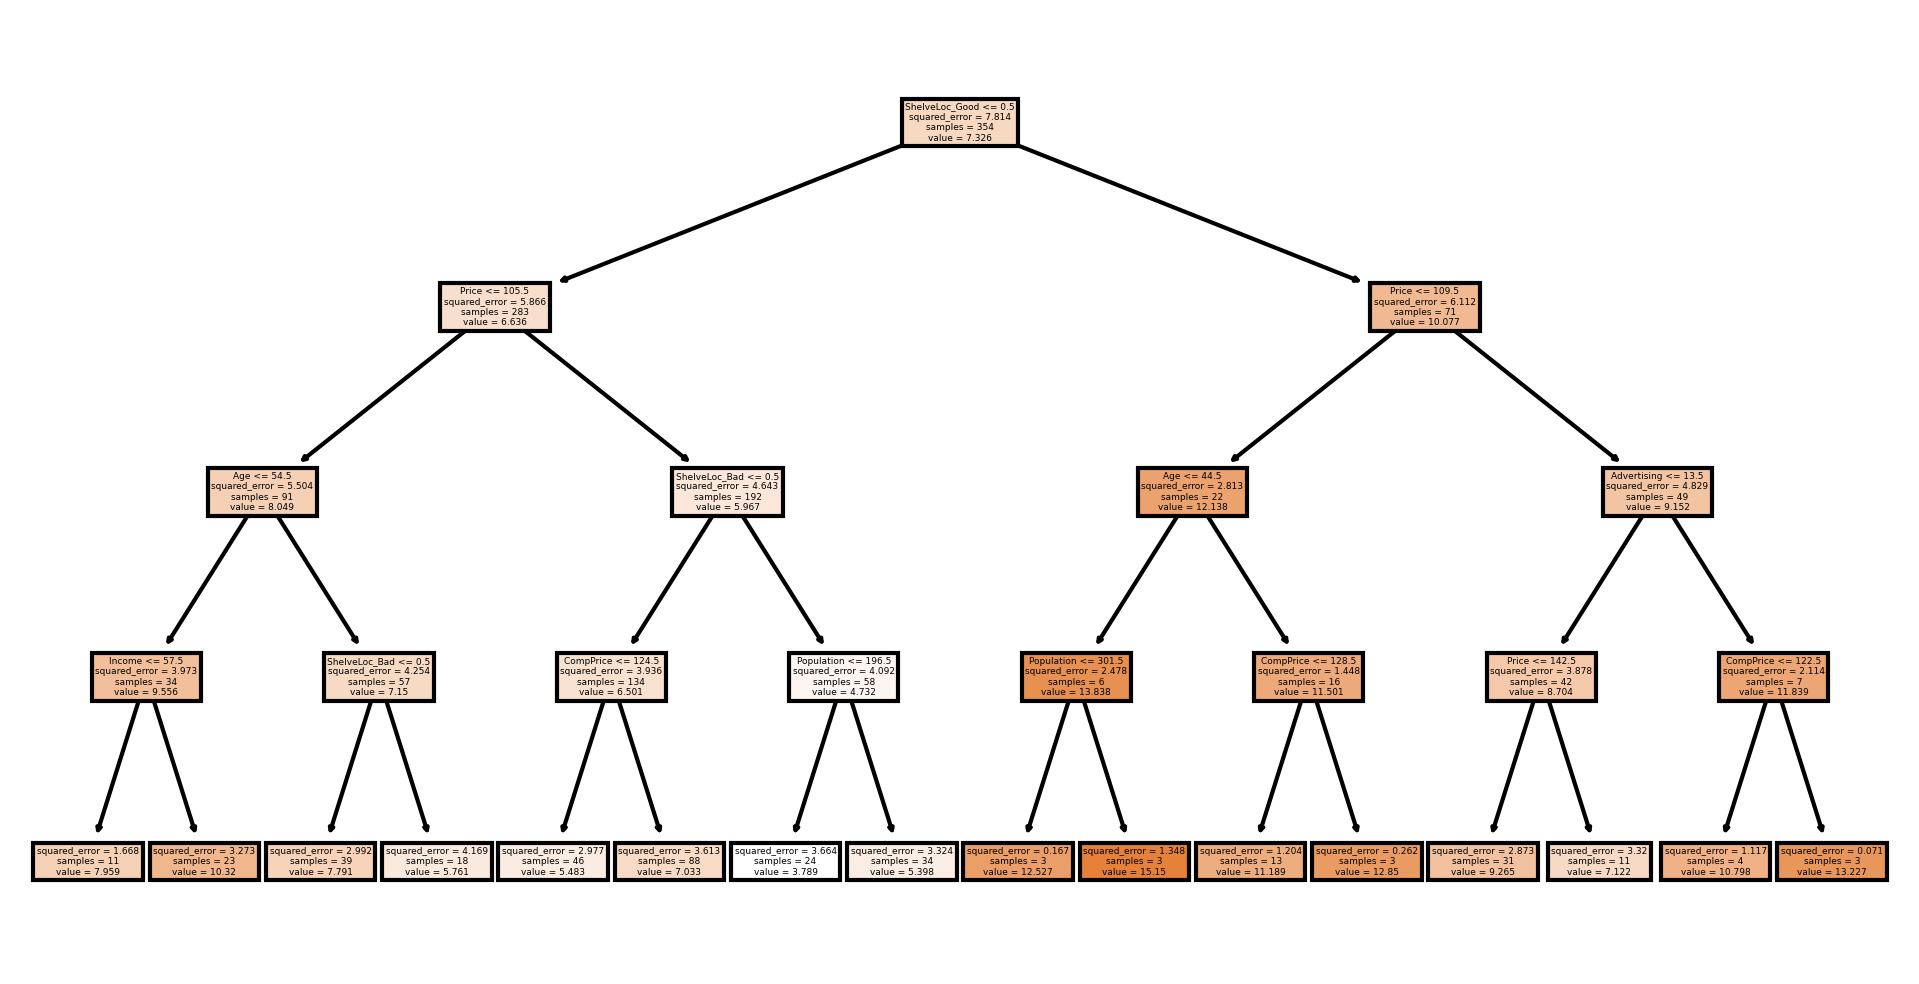

In [48]:
fn=[ 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)
tree.plot_tree(model, feature_names = fn, filled=True)

In [49]:
pred = model.predict(x_test)

In [50]:
pred

array([ 7.03318182,  5.48304348, 11.18923077,  9.26548387,  5.48304348,
       15.15      ,  5.48304348,  7.95909091,  7.95909091, 12.85      ,
       10.31956522,  5.39794118, 12.85      ,  9.26548387,  9.26548387,
        7.03318182,  7.79076923,  7.79076923,  7.03318182,  7.03318182,
       10.31956522,  7.12181818,  5.48304348,  7.79076923,  7.79076923,
        3.78916667, 11.18923077,  9.26548387,  5.48304348,  7.03318182,
       10.31956522,  5.76055556,  5.39794118, 10.31956522,  5.76055556,
       10.31956522,  7.03318182, 13.22666667,  5.48304348, 13.22666667])

In [51]:
y_test

array([ 5.08,  7.53,  9.46, 12.53,  6.18, 10.26,  8.65,  7.5 ,  8.79,
       12.57, 11.91,  4.53, 12.66,  9.71,  8.77,  9.32, 11.48,  7.7 ,
       10.27,  7.3 ,  7.63,  7.49,  7.32,  9.64,  9.33,  3.24, 14.37,
        9.16,  6.44,  9.01,  6.64,  5.07,  5.83,  9.14, 11.18, 10.36,
        4.9 , 12.57,  4.68, 11.85])

In [52]:
model.score(x_test, y_test)

0.3684585548241338

# End Assignment